# <center><font color='MediumSeaGreen'>Desafío - Clasificación desde Machine Learning </font><center>

### <center><b> Bárbara Pérez </b><center>

________

## <font color='MediumSeaGreen'>Descripción</font>

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.

Dentro de ésta se registran las siguientes observaciones:

● <span style='background:gainsboro'><font color='dimgray'>default</font></span> : Variable binaria. Registra si el cliente entró en morosidad o no.

● <span style='background:gainsboro'><font color='dimgray'>income</font></span> : Ingreso promedio declarado por el cliente.

● <span style='background:gainsboro'><font color='dimgray'>balance</font></span> : Total de saldo en la cuenta de crédito.

● <span style='background:gainsboro'><font color='dimgray'>student</font></span> : Variable binaria. Registra si el cliente es estudiante o no.

______

## <font color='MediumSeaGreen'>Desafío 1: Preparación del ambiente de trabajo</font> 

● Importe los módulos básicos para el análisis de datos

● Importe <span style='background:gainsboro'><font color='dimgray'>seaborn</font></span>.

● Importe <span style='background:gainsboro'><font color='dimgray'>statsmodels</font></span>.

● Importe <span style='background:gainsboro'><font color='dimgray'>LogisticRegression</font></span>, <span style='background:gainsboro'><font color='dimgray'>train_test_split</font></span>, <span style='background:gainsboro'><font color='dimgray'>StandardScaler</font></span>, <span style='background:gainsboro'><font color='dimgray'>classification_report</font></span> y <span style='background:gainsboro'><font color='dimgray'>roc_curve</font></span> de <span style='background:gainsboro'><font color='dimgray'>sklearn</font></span>.

In [1]:
#Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

#Importar statsmodels
#Regresion econometrica
import statsmodels.formula.api as smf


#Regresión con Machine Learning
from sklearn.linear_model import LinearRegression as linreg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Metricas de reporte 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from sklearn import metrics

#Configurar graficos
plt.style.use('seaborn-whitegrid')


#Ignorar avisos warnirng
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('default_credit.csv')

In [3]:
df.head(10)

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513331,24905.226578
7,8,No,Yes,808.667504,17600.451344
8,9,No,No,1161.057854,37468.529288
9,10,No,No,0.000000,29275.268293


In [4]:
df = df.drop(columns='index',axis=1)

In [5]:
df.shape

(10000, 4)

______

## <font color='MediumSeaGreen'>Desafío 2: Análisis exploratorio</font> 

● Explore las principales relaciones entre las variables. Utilizando los métodos <span style='background:gainsboro'><font color='dimgray'>boxplot</font></span> y <span style='background:gainsboro'><font color='dimgray'>lmplot</font></span> de seaborn implemente los siguientes gráficos.

    ○ Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    ○ Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    ○ Un boxplot del balance total de las cuentas, segmentado por el status de default.
    ○ Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    ○ Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
    ○ Un diagrama de dispersión entre balance e income, segmentado por el status de default.
   
● Comente brevemente sobre los principales patrones de comportamiento.


**tip**: Puede utilizar el argumento <span style='background:gainsboro'><font color='dimgray'>hue</font></span> en <span style='background:gainsboro'><font color='dimgray'>lmplot</font></span> para identificar las observaciones por status.

- **Boxplot**

Balance total de las cuentas, segmentado por el status de estudiante


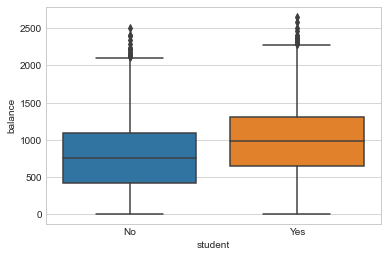

Ingreso total de cada cliente, segmentado por el status de estudiante.


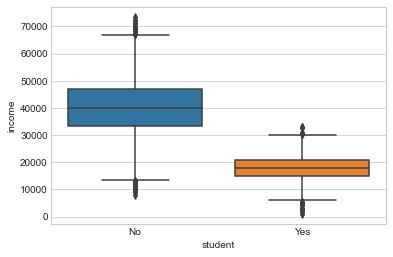

Balance total de las cuentas, segmentado por el status de default.


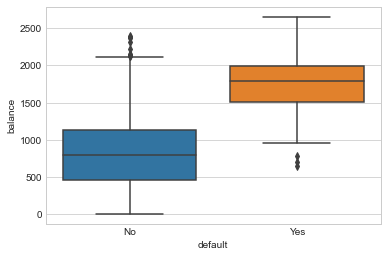

Ingreso total de cada cliente, segmentado por el status de default.


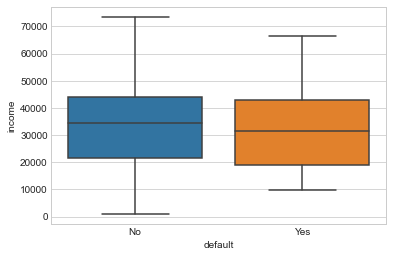

In [6]:
print("Balance total de las cuentas, segmentado por el status de estudiante")
sns.boxplot(x='student', y='balance', data=df)
plt.show()

print("Ingreso total de cada cliente, segmentado por el status de estudiante.")
sns.boxplot(x='student', y='income', data=df)
plt.show()

print("Balance total de las cuentas, segmentado por el status de default.")
sns.boxplot(x='default', y='balance', data=df)
plt.show()

print("Ingreso total de cada cliente, segmentado por el status de default.")
sns.boxplot(x='default', y='income', data=df)
plt.show()



**Diagrama de dispersión**

Diagrama de dispersión entre balance e income, segmentado por el status de estudiante


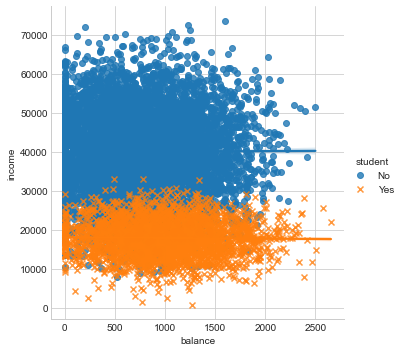

In [7]:
print("Diagrama de dispersión entre balance e income, segmentado por el status de estudiante")
sns.lmplot(x="balance", y="income", hue="student", data=df, markers=["o", "x"])
plt.show()

Diagrama de dispersión entre balance e income, segmentado por el status de default.


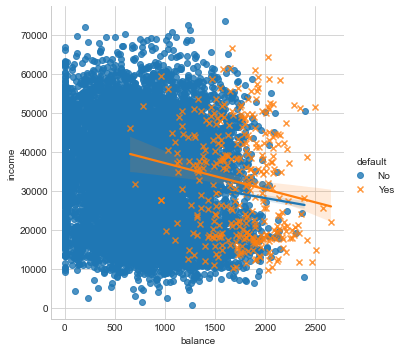

In [8]:
print("Diagrama de dispersión entre balance e income, segmentado por el status de default.")
sns.lmplot(x="balance", y="income", hue="default", data=df, markers=["o", "x"])
plt.show()

**Comente brevemente sobre los principales patrones de comportamiento.**

En los graficos del tipo bloxpot anteriores se puede observar los siguente:

- No existe una diferencia significativa entre el total de saldo en la cuenta de crédito (balance) y ser estudiante o no.

- El Ingreso promedio declarado por el cliente (income) se ve afectado significativamente si no es estudiante, en cambio si la persona es estudiante se observan ingresos menores.

- El total de saldo en la cuenta de crédito (balance) es significativamente superior que los clientes morosos (default).

- El Ingreso promedio declarado por el cliente (income) no se ve afectado si el cliente es moroso (default) o no.

En los graficos del tipo Diagrama de dispersión anteriores se puede observar los siguente:

- Se observa que las personas que No son estudiantes tienen más ingresos (income) vs los que Si son estudiantes.

- Se observa que entre más aumente el total de saldo en la cuenta de crédito (balance) más aumentarán las probabilidades de ser un cliente moroso (default)

_______

## <font color='MediumSeaGreen'>Desafío 3: Modelación econométrica</font> 

● Recodifique las variables <span style='background:gainsboro'><font color='dimgray'>student</font></span> y <span style='background:gainsboro'><font color='dimgray'>default</font></span> para que adquieran atributos numéricos.

● Implemente el siguiente modelo econométrico:

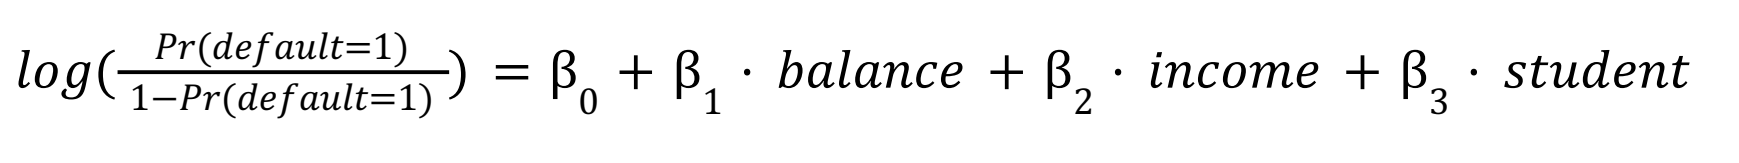


● A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [9]:
df_new = df.copy()

In [10]:
df_new['student_b'] = np.where(df_new['student'] == 'Yes', 1, 0)

In [11]:
df_new['default_b'] = np.where(df_new['default'] == 'Yes', 1, 0)

In [12]:
df_new.sample(5)

,default,student,balance,income,student_b,default_b
8926,No,Yes,1106.323694,21202.030075,1,0
599,No,Yes,1178.248909,29362.604609,1,0
5262,No,No,966.051877,10174.729802,0,0
6580,No,No,892.281072,40492.100582,0,0
5673,No,No,270.585759,44958.631267,0,0


In [13]:
df_new=df_new.drop(columns="student")
df_new=df_new.drop(columns="default")

In [14]:
df_new.head()

,balance,income,student_b,default_b
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,1,0
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   balance    10000 non-null  float64
 1   income     10000 non-null  float64
 2   student_b  10000 non-null  int32  
 3   default_b  10000 non-null  int32  
dtypes: float64(2), int32(2)
memory usage: 234.5 KB


In [16]:
#creamos el modelo saturado
modelo_saturado = smf.logit('default_b ~ balance + income + student_b', data=df_new).fit()
modelo_saturado.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_b        AIC:              1579.5448  
Date:               2022-07-22 02:24 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
student_b    -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

Se observa que el modelo explica en un 0.462 la varianza de la variable 'default_b', sin embargo se aprecia que en la variable 'income' no aportan significativamente a la predicción del valor de la variable dependiente.

### **A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.**

In [17]:
#creamos el modelo depurado
modelo_depurado = smf.logit('default_b ~ balance + student_b', data=df_new).fit()
modelo_depurado.summary2()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_b        AIC:              1577.6816  
Date:               2022-07-22 02:24 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -10.7495    0.3692  -29.1149  0.0000  -11.4731  -10.0259
balance      0.0057    0.0002   24.7485  0.0000    0.0053    0.0062
student_b   -0.7149    0.1475   -4.8459  0.0000   -1.0040   -0.4257
==================================================================

"""

Se observa que se mantiene el valor de Pseudo R-squared (0.462), manteniendose las variables con los mismos valores previos a la depuración. Esto significa que el modelo depurado es más generalista.

Se observa que la variable student_b contribuye en forma negativa con el aumento de que el cliente entre en morosidad (default), y por el contrario la variable 'balance' contribuye en forma positiva con el aumento de ser un cliente moroso (default)

_________

## <font color='MediumSeaGreen'>Desafío 4: Entrenar</font> 

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:

    ● Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.

    ● Estandarice las matrices de atributos de entrenamiento y pruebas usando StandardScaler() ajustado solo sobre el conjunto de entrenamiento.

    ● Implemente el modelo sin alterar los hiper parámetros. 

    ● Genere la predicción de las clases y de la probabilidad.

    ● Reporte las métricas de precisión, recall y f1 para ambas clases.

    ● Grafique la curva Receiver Operator Characteristic.

    ● En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC


In [18]:
#Definimos la variable y
df_var_y = df_new['default_b']

#Eliminamos de la variable X la columna utilizada en la variable_y e 'income' porque no aporta significativamente
df_var_x = df_new.drop(columns=['default_b', 'income'])

In [19]:
#Se genera un conjunto de entrenamiento y validacion para los datos entregados
x_train, x_test, y_train, y_test = train_test_split(df_var_x, df_var_y, test_size=.33,
random_state=3)

In [20]:
# estandarizamos la matriz de entrenamiento
x_train_std = StandardScaler().fit_transform(x_train)
# estandarizamos la matriz de pruebas
x_test_std = StandardScaler().fit_transform(x_test)

- **Implemente el modelo sin alterar los hiperparámetros.**

In [21]:
# iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
default_model = LogisticRegression(random_state=3).fit(x_train_std, y_train)

In [22]:
default_model

LogisticRegression(random_state=3)

In [23]:
default_model.coef_

array([[ 2.71110072, -0.34238763]])

### **Genere la predicción de las clases y de la probabilidad.**

In [24]:
yhat = default_model.predict(x_test_std)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
yhat_proba = default_model.predict_proba(x_test_std)
yhat_proba[:10].round(2)

array([[1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

### **Reporte las métricas de precisión, recall y f1 para ambas clases.**

In [26]:
#reportamos las métricas de precisión, recall y f1-score para ambas clases, como clase
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3187
           1       0.82      0.35      0.49       113

    accuracy                           0.98      3300
   macro avg       0.90      0.68      0.74      3300
weighted avg       0.97      0.98      0.97      3300



### **Grafique la curva Receiver Operator Characteristic.**

In [27]:
#Curva ROC
plt.rcParams['figure.figsize'] = (12, 10)

#volvemos a estimar los valores para obtener pa prob entre 0 y 1
yhat_roc = default_model.predict_proba(x_test_std)[:, 1]

#generamos los objetos de roc cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat_roc)


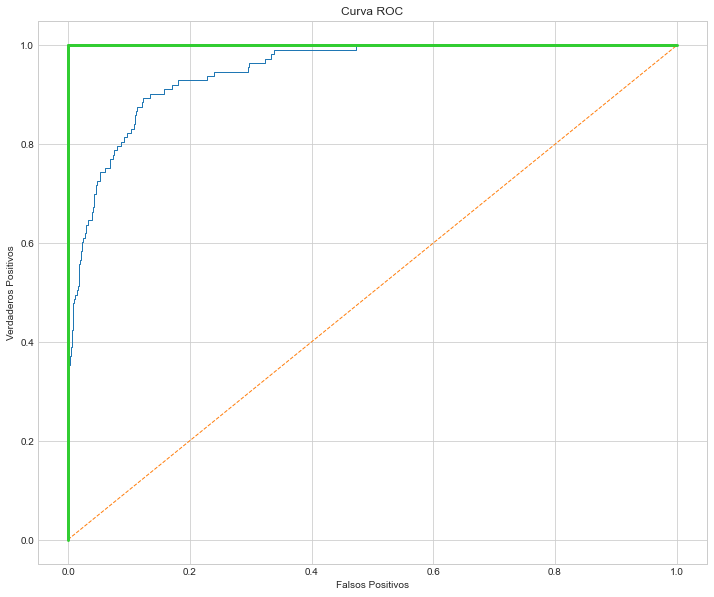

In [28]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');
plt.show()

In [29]:
#estimamos el area bajo la curva
roc_auc_score(y_test,yhat_roc)

0.9486492415260002

### **En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC**

**El modelo tiene una precisión de:** 
- 98% para la clase 0
- 82% para la clase 1

**El modelo tiene una sensibilidad(recall) de**:
- 100% para la clase 0
- 35% para la clase 1

**El modelo tiene un f1-score(media armonica entre pres. y sensibilidad) de**:
- 99% para la clase 0
- 49% para la clase 1

**El modelo tiene un desempeño predictivo de 44.84% superior a la clasificación aleatoria.**

___________